## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.regularizers import l1, l2, l1_l2
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0716 11:09:57.666879  7364 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4076: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Experiment with Regulizer = 0.010000


W0716 11:09:57.961793  7364 deprecation_wrapper.py:119] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\keras\optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0716 11:10:00.081479  7364 deprecation.py:323] From C:\Users\KCB-SA\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 234us/step - loss: 15.0677 - acc: 0.2733 - val_loss: 13.9424 - val_acc: 0.3387
Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 13.0006 - acc: 0.3598 - val_loss: 12.1060 - val_acc: 0.3774
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 11.3284 - acc: 0.3846 - val_loss: 10.5720 - val_acc: 0.3981
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 9.9171 - acc: 0.3967 - val_loss: 9.2754 - val_acc: 0.4093
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 8.7172 - acc: 0.4063 - val_loss: 8.1787 - val_acc: 0.4086
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 7.6955 - acc: 0.4172 - val_loss: 7.2361 - val_acc: 0.4194
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 6.8268 - acc: 0.4227 - val_loss: 6.

Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9513 - acc: 0.3630 - val_loss: 1.8963 - val_acc: 0.3785
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8588 - acc: 0.3949 - val_loss: 1.8229 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.7963 - acc: 0.4195 - val_loss: 1.7739 - val_acc: 0.4281
Epoch 5/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.7470 - acc: 0.4360 - val_loss: 1.7403 - val_acc: 0.4337
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7090 - acc: 0.4489 - val_loss: 1.7019 - val_acc: 0.4525
Epoch 7/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6752 - acc: 0.4597 - val_loss: 1.6816 - val_acc: 0.4552
Epoch 8/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6478 - acc: 0.4692 - val_loss: 1.6515 - val_acc: 0.4667
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 159us/step - loss: 1.7178 - acc: 0.3984 - val_loss: 1.6827 - val_acc: 0.4162
Epoch 4/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6590 - acc: 0.4186 - val_loss: 1.6302 - val_acc: 0.4301
Epoch 5/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6111 - acc: 0.4339 - val_loss: 1.5914 - val_acc: 0.4434
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5709 - acc: 0.4474 - val_loss: 1.5639 - val_acc: 0.4527
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5367 - acc: 0.4598 - val_loss: 1.5449 - val_acc: 0.4593
Epoch 8/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5067 - acc: 0.4693 - val_loss: 1.5124 - val_acc: 0.4658
Epoch 9/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4793 - acc: 0.4795 - val_loss: 1.5037 - val_acc: 0.4677
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 149us/step - loss: 1.6685 - acc: 0.4136 - val_loss: 1.6474 - val_acc: 0.4206
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6164 - acc: 0.4321 - val_loss: 1.5974 - val_acc: 0.4387
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5764 - acc: 0.4468 - val_loss: 1.5806 - val_acc: 0.4412
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5403 - acc: 0.4605 - val_loss: 1.5450 - val_acc: 0.4596
Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5104 - acc: 0.4703 - val_loss: 1.5366 - val_acc: 0.4539
Epoch 9/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4838 - acc: 0.4787 - val_loss: 1.5149 - val_acc: 0.4635
Epoch 10/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4583 - acc: 0.4899 - val_loss: 1.4921 - val_acc: 0.4687
Epoch 11/50
50000/50000 [===================

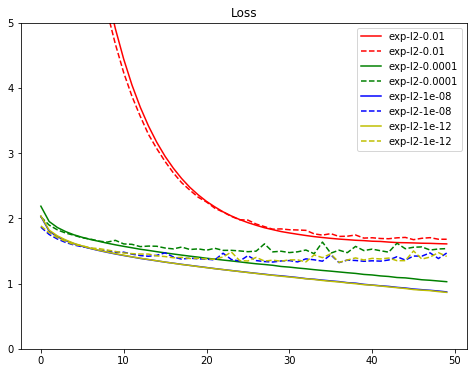

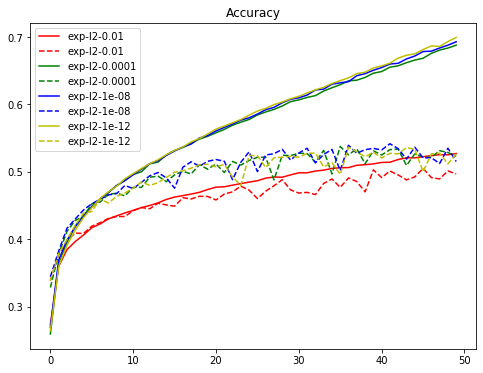

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()